In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import fastpathplanning as fpp

In [2]:
# offline preprocessing
L = np.array([
    [6.25,    4],
    [ 5.5,  2.5],
    [   1,    4],
    [ .25,  1.5],
    [2.25,  .75],
    [  .5, -.25],
    [   2,    0],
    [4.75, -.25],
    [   0,  5.2]
]) # lower bounds of the safe boxes
U = np.array([
    [7.25, 5.75],
    [ 7.5, 4.75],
    [   6,    5],
    [   7,    3],
    [   3,  2.5],
    [ 1.5,  4.5],
    [6.25,    1],
    [   6, 3.75],
    [   7,    6]
])# upper bounds of the safe boxes
S = fpp.SafeSet(L, U, verbose=True)

Preprocessing started.
Computing interesctions of 9 boxes in 2 dimensions...
...found 11 intersections.
Computing line graph...
...line graph has 11 vertices and 20 edges.


/usr/local/lib/python3.11/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [3]:
# online path planning
p_init = np.array([1, .25]) # initial point
p_term = np.array([.5, 5.6]) # terminal point
T = 10 # traversal time
alpha = [0, 0, 1] # cost weights
p = fpp.plan(S, p_init , p_term , T, alpha)

Polygonal phase started.
Iter. 1: curve length 13.736, number of boxes 5.
Iter. 2: curve length 13.45, number of boxes 6.
Terminated in 2 iterations.
Final length is 13.45.
Solver time was 0.00038.

Smooth phase started.
Iter. 0: cost 6.26.
Iter. 1, cost 1.763, kappa inf.
Iter. 2, cost 1.24, kappa 0.20390668116033217.
Iter. 3, cost 1.265, kappa 0.0679688935285867.
Iter. 4, cost 1.225, kappa 0.022656297543789432.
Iter. 5, cost 1.232, kappa 0.007552097987343835.
Terminated in 5 iterations.
Final cost is 1.225.
Solver time was 0.01869.


In [4]:
# evaluate solution
t = 0.5 # sample time
p_t = p(t)
print(p_t)

[1.34321638 1.19144257]


<IPython.core.display.Javascript object>


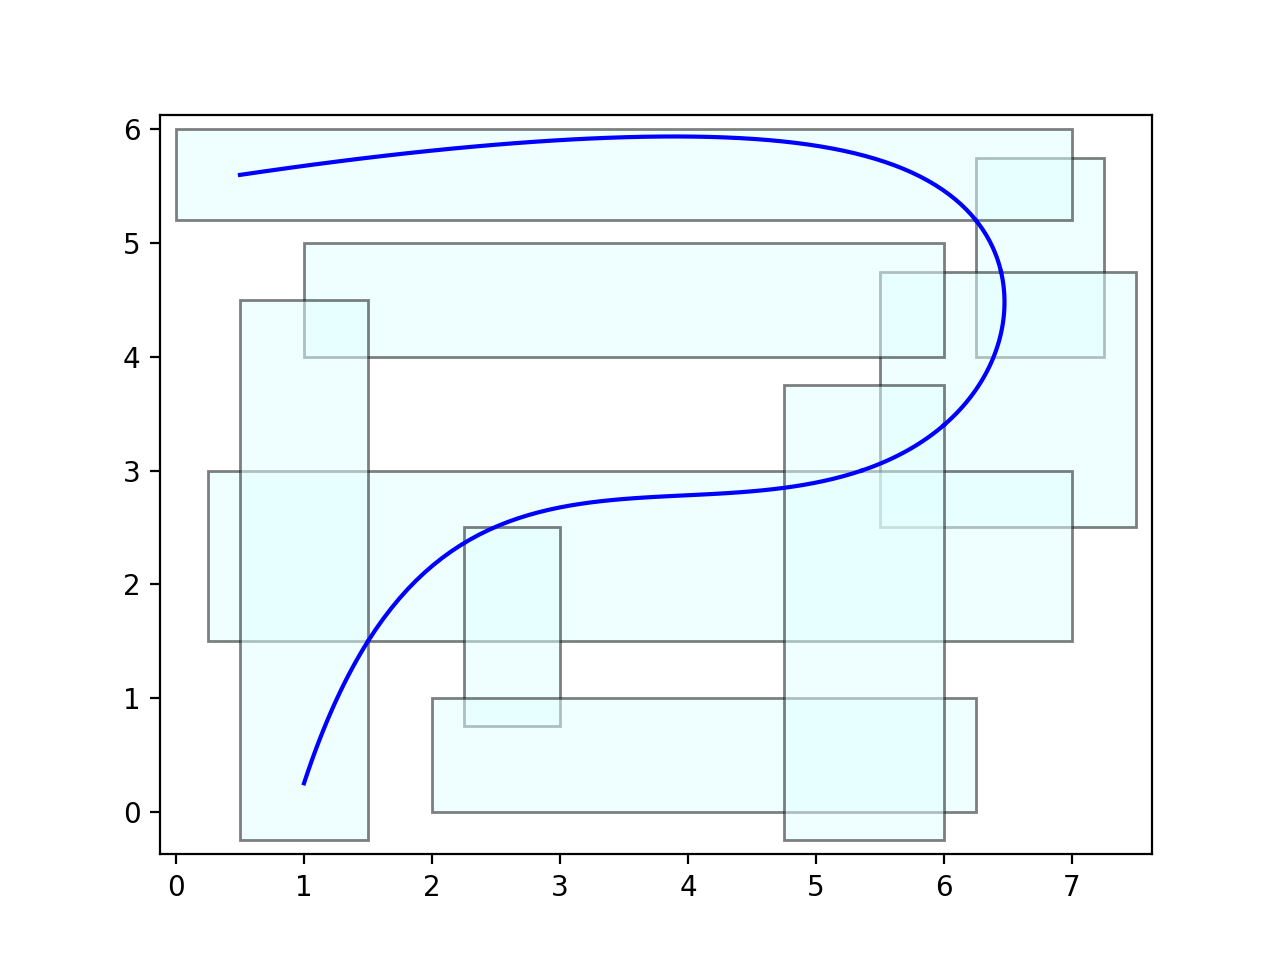

In [5]:
import matplotlib.pyplot as plt

# plot result
plt.figure()
S.plot2d(alpha=.5) # plot safe set
p.plot2d() # plot smooth path